In [49]:
import pandas as pd
import numpy as np
import os
f_base = '../长三角城市年度数据/'
files = os.listdir(f_base)
files

['上海市_113个指标.xls',
 '安徽省合肥_111个指标.xls',
 '安徽省安庆_112个指标.xls',
 '安徽省宣城_112个指标.xls',
 '安徽省池州_112个指标.xls',
 '安徽省滁州_112个指标.xls',
 '安徽省芜湖_112个指标.xls',
 '安徽省铜陵_112个指标.xls',
 '安徽省马鞍山_111个指标.xls',
 '江苏省南京市_113个指标.xls',
 '江苏省南通市_113个指标.xls',
 '江苏省常州市_113个指标.xls',
 '江苏省扬州市_113个指标.xls',
 '江苏省无锡市_113个指标.xls',
 '江苏省泰州_113个指标.xls',
 '江苏省盐城市_113个指标.xls',
 '江苏省苏州市_113个指标.xls',
 '江苏省镇江市_113个指标.xls',
 '浙江省台州_112个指标.xls',
 '浙江省嘉兴_113个指标.xls',
 '浙江省宁波_113个指标.xls',
 '浙江省杭州_113个指标.xls',
 '浙江省温州_113个指标.xls',
 '浙江省湖州_112个指标.xls',
 '浙江省绍兴_112个指标.xls',
 '浙江省舟山_112个指标.xls',
 '浙江省金华_112个指标.xls']

In [50]:
def Standard_data(data):
    '''
    s = （s - mean）/（max-min）
    '''
    for i in data.columns:
        data[i]=round((data[i]-np.mean(data[i]))/(np.max(data[i])-np.min(data[i])),3)
    return data

In [51]:
def Sum_score(data,col):
    '''
    分数总和命名为col
    将小分加起来
    '''
    sum_score = pd.DataFrame(columns=col)
    for i in data.index:
        sum_score.loc[i] = np.mean(data.loc[i])
    return sum_score

In [52]:
def Eduscore(data,localname,eduscore):
    local_eduscore = pd.DataFrame()
    local_eduscore['教育投入占比'] = data['一般公共预算支出_教育_市辖区']/data['GDP_市辖区']
    local_eduscore['师生比'] = (data['普通高等学校在校生数_市辖区']+data['普通中学在校生数_市辖区']+data['普通小学在校生数_市辖区'])/(data['普通高等学校专任教师数_市辖区']+data['普通中学专任教师数_市辖区']+data['普通小学专任教师数_市辖区'])
    local_eduscore['公共图书馆占比'] = data['公共图书馆总藏量_市辖区'] / data['城市户籍人口数']
    eduscore1 = pd.DataFrame(columns = ['教育投入占比','师生比','公共图书馆占比'])
    eduscore1.loc[localname] = [np.mean(local_eduscore['教育投入占比']),np.mean(local_eduscore['师生比']),np.mean(local_eduscore['公共图书馆占比'])]
    eduscore =pd.concat([eduscore,eduscore1],axis=0)
    return eduscore

In [53]:
def Score():
    score = pd.DataFrame()
    eduscore = pd.DataFrame()
    for f in files:
        '''
        每个地区数据预处理
        本次只根据2016年的数据进行计算
        '''
        data = pd.read_excel(f_base+f)
        data['地区']= data.iloc[0,1]
        localname = data.iloc[0,1]
        data.drop(index=[0,1,2],inplace=True)
        data.index=data['指标']
        data.index.name='年份'
        data.drop(columns=['指标'],inplace=True)
        data.columns.name='指标'
        # data = data.convert_dtypes()
        data.describe()
        '''计算得分'''
        eduscore = Eduscore(data,localname,eduscore)
    # eduscore
    eduscore.to_excel('../细分指标/教育细分指标.xlsx')
    eduscore = Standard_data(eduscore)
    plt = eduscore.plot.bar(figsize=(15,10),title = '教育细分指标')
    img = plt.get_figure()
    img.savefig('../image/eduscore.png')
    eduscore = round(Sum_score((eduscore+0.5),['教育得分'])*10,1)
    
    # score
    score=pd.concat([score,eduscore],axis = 1)
    return score

,教育得分
上海市,8.6
合肥市,6.7
安庆市,4.0
宣城市,4.0
池州市,5.9
滁州市,5.3
芜湖市,5.7
铜陵市,3.8
马鞍山市,3.8
南京市,7.1


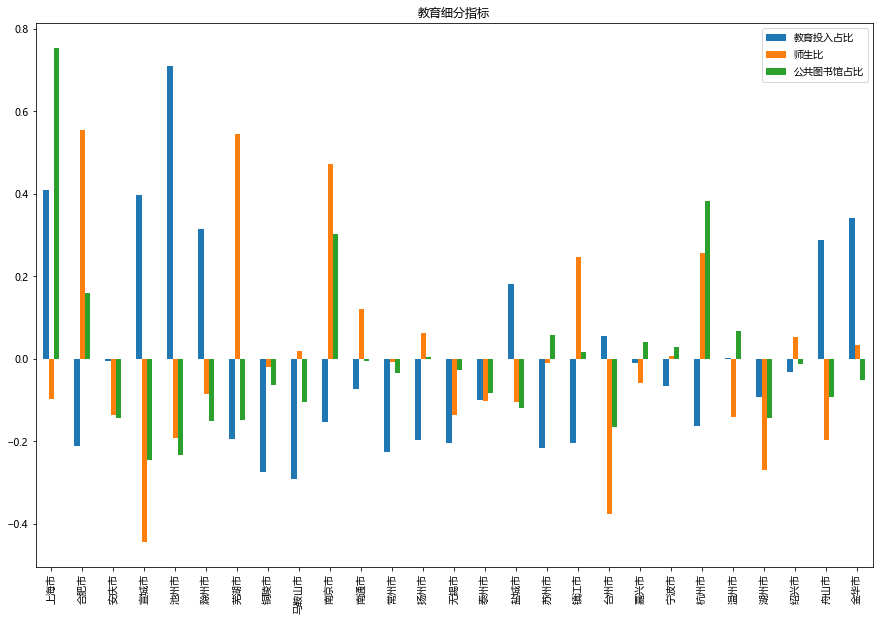

In [54]:
score = Score()
score

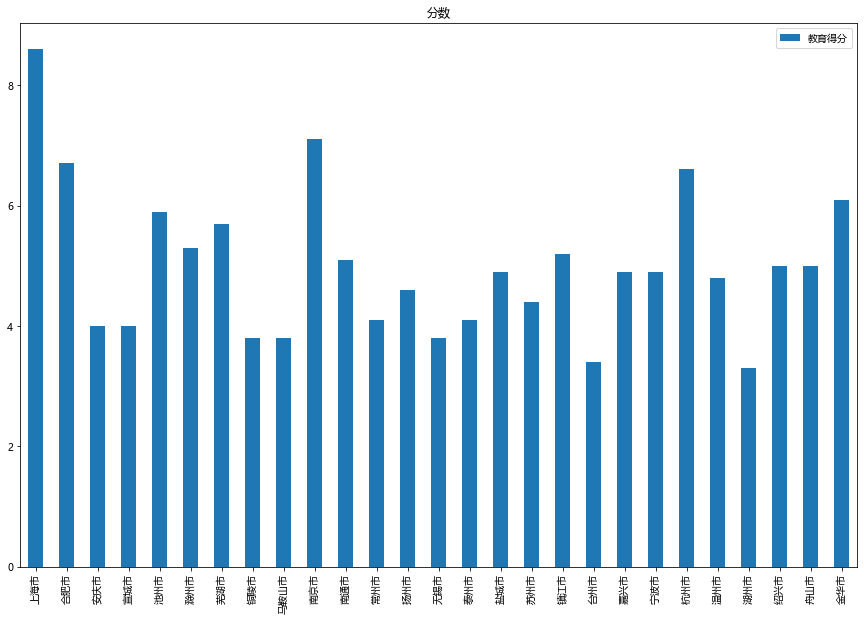

In [55]:
%matplotlib inline
plt = score.plot.bar(figsize=(15,10),title = '分数')
img = plt.get_figure()
img.savefig('../image/score.png')

In [56]:
score.to_excel('../指标.xlsx')